# Seasonality

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('../Data/ts_s.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Value
Date,
2020-01-31,3.528105
2020-02-29,5.850314
2020-03-31,10.717730
2020-04-30,14.631786
2020-05-31,12.595370


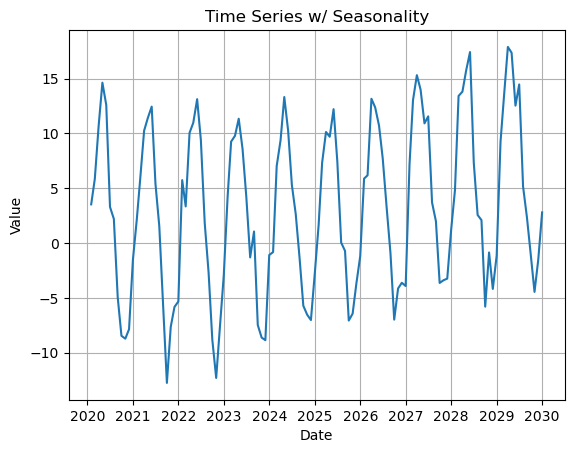

In [4]:
plt.plot(df.index, df['Value'])
plt.title('Time Series w/ Seasonality')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

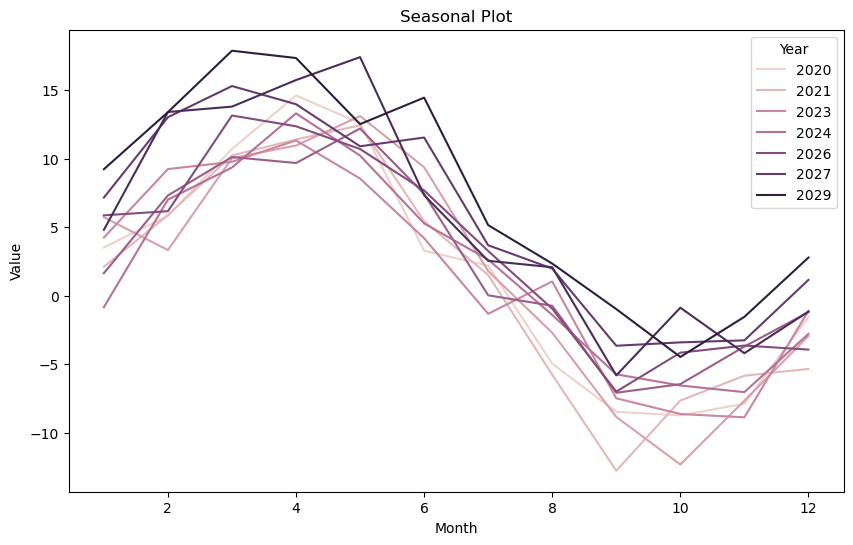

In [38]:
#Seasonal plot
df['Year'] = df.index.year
df['Month'] = df.index.month

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Month', y='Value', hue='Year')
plt.title('Seasonal Plot')
plt.xlabel('Month')
plt.ylabel('Value')
plt.show()

In [5]:
df['Linear_Time_Trend'] = np.arange(len(df))
print(df['Linear_Time_Trend'].head())

Date
2020-01-31    0
2020-02-29    1
2020-03-31    2
2020-04-30    3
2020-05-31    4
Name: Linear_Time_Trend, dtype: int64


In [6]:
model = smf.ols('Value ~ 1 + Linear_Time_Trend', data=df).fit()
print(model.summary())
df['yhat1'] = model.fittedvalues
df['e1'] = model.resid

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.516
Date:                Fri, 26 Jul 2024   Prob (F-statistic):             0.0632
Time:                        13:35:33   Log-Likelihood:                -412.02
No. Observations:                 120   AIC:                             828.0
Df Residuals:                     118   BIC:                             833.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.0172      1.37

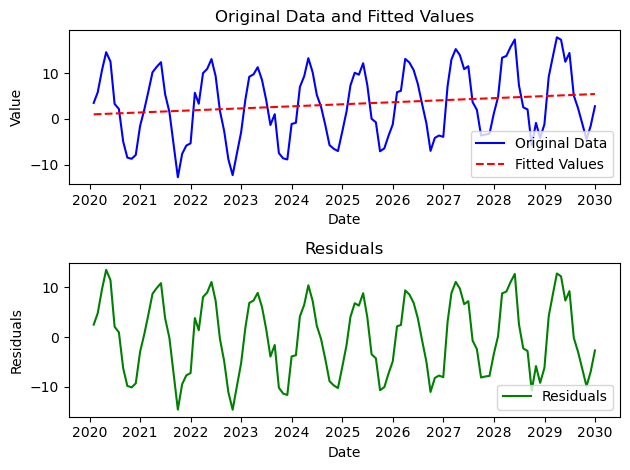

In [25]:
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Value'], label='Original Data', color='blue')
plt.plot(df.index, df['yhat1'], label='Fitted Values', color='red', linestyle='--')
plt.title('Original Data and Fitted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['e1'], label='Residuals', color='green')
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
df['Month'] = df.index.month
df['Month'].head(15)
df.head()

,Value,Linear_Time_Trend,yhat1,e1,Month
Date,,,,,
2020-01-31,3.528105,0,1.017161,2.510944,1
2020-02-29,5.850314,1,1.054523,4.795791,2
2020-03-31,10.717730,2,1.091886,9.625844,3
2020-04-30,14.631786,3,1.129248,13.502538,4
2020-05-31,12.595370,4,1.166610,11.428760,5


In [18]:
df = pd.get_dummies(df, columns=['Month'], drop_first=True)
df.head()

,Value,Linear_Time_Trend,yhat1,e1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
Date,,,,,,,,,,,,,,,
2020-01-31,3.528105,0,1.017161,2.510944,0,0,0,0,0,0,0,0,0,0,0
2020-02-29,5.850314,1,1.054523,4.795791,1,0,0,0,0,0,0,0,0,0,0
2020-03-31,10.717730,2,1.091886,9.625844,0,1,0,0,0,0,0,0,0,0,0
2020-04-30,14.631786,3,1.129248,13.502538,0,0,1,0,0,0,0,0,0,0,0
2020-05-31,12.595370,4,1.166610,11.428760,0,0,0,1,0,0,0,0,0,0,0


In [20]:
model2 = smf.ols('Value ~ 1 + Linear_Time_Trend + Month_2 + Month_3 + Month_4 + Month_5 + Month_6 + Month_7 + Month_8 + Month_9 + Month_10 + Month_11 + Month_12', data=df).fit()
print(model2.summary())
df['yhat2'] = model2.fittedvalues
df['e2'] = model2.resid

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     127.6
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           1.40e-57
Time:                        13:36:02   Log-Likelihood:                -250.08
No. Observations:                 120   AIC:                             526.2
Df Residuals:                     107   BIC:                             562.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.4466      0.71

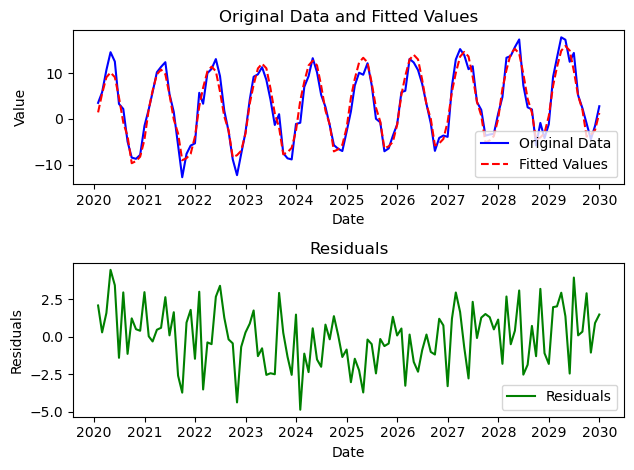

In [22]:
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Value'], label='Original Data', color='blue')
plt.plot(df.index, df['yhat2'], label='Fitted Values', color='red', linestyle='--')
plt.title('Original Data and Fitted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(df.index, df['e2'], label='Residuals', color='green')
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()